# Regressão - parte 3

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```.  
2. Remova as variáveis não significantes.  
3. observe o gráfico de resíduos em função de ```net_bill```  
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.

In [3]:
# Carregando bibliotecas 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# Carregando dataset

tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98


In [5]:
# Gerando a matriz design e a matriz y

y, X = patsy.dmatrices('tip ~ sex + smoker + time + net_bill', tips)
X, y

(DesignMatrix with shape (244, 5)
   Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
           1              1             1               1     15.98
           1              0             1               1      8.68
           1              0             1               1     17.51
           1              0             1               1     20.37
           1              1             1               1     20.98
           1              0             1               1     20.58
           1              0             1               1      6.77
           1              0             1               1     23.76
           1              0             1               1     13.08
           1              0             1               1     11.55
           1              0             1               1      8.56
           1              1             1               1     30.26
           1              0             1               1     13.85
           1  

In [6]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.64e-20
Time:                        12:59:02   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='color:blue'> Removendo as variáveis `sex`e `time` devido ao valor significativamente alto do P-value ($P>|t|$)</span>

In [8]:
# New model
y, X = patsy.dmatrices('tip ~ smoker + net_bill', tips)

In [9]:
# Fitting the model
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.67
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           4.56e-22
Time:                        12:59:02   Log-Likelihood:                -375.20
No. Observations:                 244   AIC:                             756.4
Df Residuals:                     241   BIC:                             766.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.2318      0.200      6.172      0.000       0.839       1.625
smoker[T.No]     0.1385      0.150      0.923      0.357      -0.157       0.434
net_bill         0.1001      0.009     11.015      0.000       0.082       0.118
==============================================================================
Omnibus:                       37.031   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.928
Skew:                           0.809   Prob(JB):                     2.93e-15
Kurtosis:                       4.991   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Gráfico de resíduos

In [11]:
# Obtendo os valores de resíduos 

tips['model_resid'] = model.resid
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,model_resid
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,-1.960186
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,-0.579294
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.376628
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,-0.099721
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.139204


Text(0.5, 1.0, 'Padrão dos resíduos')

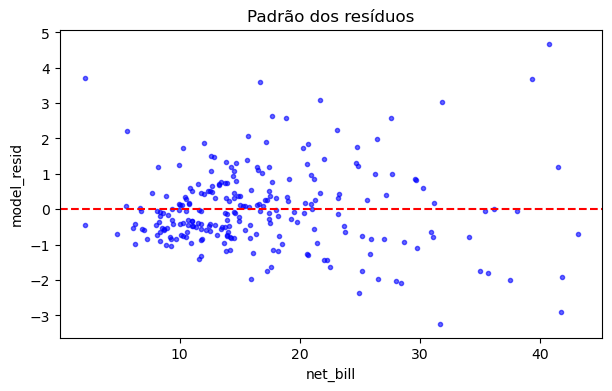

In [12]:
# Plot
plt.figure(figsize=[7,4])

plt.plot(tips['net_bill'], tips['model_resid'], '.', color='blue', alpha=.6)
plt.axhline(y=0, color='red', ls='--')
plt.xlabel('net_bill')
plt.ylabel('model_resid')
plt.title('Padrão dos resíduos')

#### Aplicando o log na variável 'net_bill'

In [14]:
y, X = patsy.dmatrices('tip ~ smoker + np.log(net_bill)', tips)
# np.asarray(X)

In [15]:
# O fitting 
model_log = sm.OLS(y, X).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.289
Method:                 Least Squares   F-statistic:                     50.34
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           5.38e-19
Time:                        12:59:02   Log-Likelihood:                -382.36
No. Observations:                 244   AIC:                             770.7
Df Residuals:                     241   BIC:                             781.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2890      0.445     -2.896      0.004      -2.166      -0.412
smoker[T.No]         0.0433      0.154      0.282      0.779      -0.260       0.347
np.log(net_bill)     1.5712      0.157     10.034      0.000       1.263       1.880
==============================================================================
Omnibus:                       75.168   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.823
Skew:                           1.320   Prob(JB):                     3.38e-50
Kurtosis:                       6.929   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='color:blue'> O valor de `R-squared` para o modelo com o ajuste logarítmico é menor do que para o modelo inicial. Tal valor indica que essa não é a melhor abordagem, pois agora o modelo explica uma menor porção da variabilidade dos dados. </span>

Text(0.5, 1.0, 'Perfil dos resíduos')

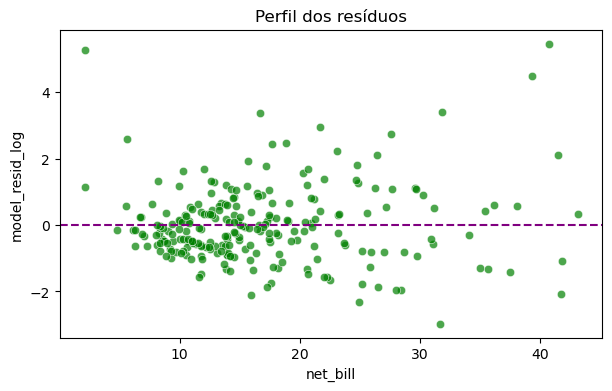

In [17]:
# O perfil dos resíduos 

# Obtendo o resíduo
tips['model_resid_log'] = model_log.resid

# Plot
plt.figure(figsize=[7,4])
sns.scatterplot(x=tips['net_bill'], y=tips['model_resid_log'], color='green', alpha=.7)
plt.axhline(y=0, color='purple', ls='--')
plt.title('Perfil dos resíduos')

#### Aplicando um ajuste polinomial de segundo grau na variável 'net_bill'

In [19]:
# Gerando as matrizes design e y

y, X = patsy.dmatrices('tip ~ smoker + I(net_bill + np.power(net_bill,2))', tips)

In [20]:
# Avaliando o modelo

model_poli = sm.OLS(y, X).fit()
model_poli.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     52.96
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           8.62e-20
Time:                        12:59:03   Log-Likelihood:                -380.51
No. Observations:                 244   AIC:                             767.0
Df Residuals:                     241   BIC:                             777.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               2.1216      0.148     14.353      0.000       1.830       2.413
smoker[T.No]                            0.1692      0.154      1.101      0.272      -0.134       0.472
I(net_bill + np.power(net_bill, 2))     0.0021      0.000     10.291      0.000       0.002       0.003
==============================================================================
Omnibus:                       25.462   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.857
Skew:                           0.673   Prob(JB):                     1.64e-08
Kurtosis:                       4.309   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Perfil dos resíduos')

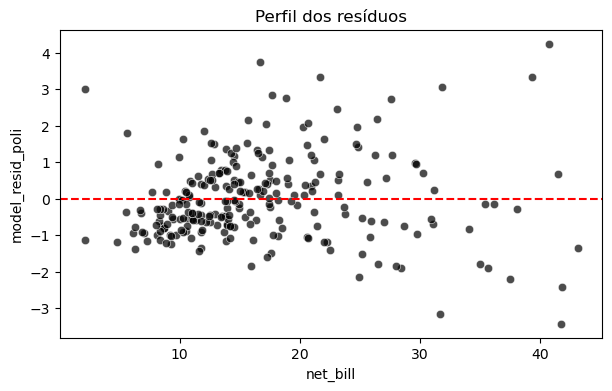

In [21]:
# O perfil dos resíduos

# O resíduo
tips['model_resid_poli'] = model_poli.resid

# Plot
plt.figure(figsize=[7,4])
sns.scatterplot(x='net_bill', y='model_resid_poli', data=tips, color='black', alpha=.7)
plt.axhline(y=0, color='red', ls='--')
plt.title('Perfil dos resíduos')

#### Insights

O modelo que melhor explica a variabilidade dos dados, ou seja, com um melhor R-quadrado, foi obtido a partir da regressão com o ajuste por polinômio de segunda ordem. O valores de R-quadrado foram:
- Ajuste logarítmico: R-quadrado = 0.295
- Ajustando um polinômio de segundo grau: <span style='color:blue'>R-quadrado = 0.305</span>

In [23]:
# Dataset final
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,model_resid,model_resid_log,model_resid_poli
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,-1.960186,-2.098808,-1.858047
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,-0.579294,-0.489856,-0.809542
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.376628,0.247527,0.519689
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,-0.099721,-0.180188,0.093126
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.139204,0.073451,0.338167


### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```.
2. Remova as variáveis não significantes.
3. Observe o gráfico de resíduos em função de ```net_bill```
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo.
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1. Qual tem melhor coeficiente de determinação?

In [25]:
# Recarregando o dataset
tips = sns.load_dataset('tips')
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069


In [26]:
# Criando o modelo no log(tip)

y, X = patsy.dmatrices('np.log(tip) ~ sex + smoker + time + net_bill', data=tips)
# np.asarray(X)
X

DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [27]:
# Fitting

reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     27.25
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           1.21e-18
Time:                        12:59:03   Log-Likelihood:                -97.419
No. Observations:                 244   AIC:                             204.8
Df Residuals:                     239   BIC:                             222.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.4504      0.078      5.801      0.000       0.297       0.603
sex[T.Female]      0.0048      0.050      0.097      0.923      -0.094       0.104
smoker[T.No]       0.0436      0.048      0.903      0.367      -0.052       0.139
time[T.Dinner]     0.0191      0.054      0.355      0.723      -0.087       0.125
net_bill           0.0304      0.003     10.152      0.000       0.024       0.036
==============================================================================
Omnibus:                        2.577   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.276   Jarque-Bera (JB):                2.235
Skew:                          -0.181   Prob(JB):                        0.327
Kurtosis:                       3.298   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='color:blue'> Com base nos *P-values*, as variáveis não significantes são `sex` e `time`. A variável `smoker` possui um valor satisfatório de *P-value*, mas seu intervalo de confiança é significativamente grande indicando que tal variável talvez não desempenhe um papel significativo ao modelo, faremos esse teste. </span>

In [29]:
# Removendo as variáveis não significativas 

y, X = patsy.dmatrices('np.log(tip) ~ smoker + net_bill', tips)

In [30]:
# O fitting
reg = sm.OLS(y, X).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     54.87
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.31e-20
Time:                        12:59:03   Log-Likelihood:                -97.483
No. Observations:                 244   AIC:                             201.0
Df Residuals:                     241   BIC:                             211.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.4639      0.064      7.254      0.000       0.338       0.590
smoker[T.No]     0.0429      0.048      0.892      0.373      -0.052       0.138
net_bill         0.0305      0.003     10.475      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.309   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.966
Skew:                          -0.169   Prob(JB):                        0.374
Kurtosis:                       3.282   Cond. No.                         57.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [31]:
# Teste removendo também a variável smoker

y, X = patsy.dmatrices('np.log(tip) ~ net_bill', data=tips)
# Fitting
reg_without_smoker = sm.OLS(y, X).fit()
reg_without_smoker.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     109.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           2.60e-21
Time:                        12:59:03   Log-Likelihood:                -97.886
No. Observations:                 244   AIC:                             199.8
Df Residuals:                     242   BIC:                             206.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4945      0.054      9.172      0.000       0.388       0.601
net_bill       0.0303      0.003     10.442      0.000       0.025       0.036
==============================================================================
Omnibus:                        2.865   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.502
Skew:                          -0.215   Prob(JB):                        0.286
Kurtosis:                       3.248   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<span style='color:purple'> Como destacado, a variável `smoker` não desempenha um papel significativo para o modelo, sua remoção alterou o fator R-quadrado em apenas 0.002, ou seja, $R^{2} = 0.313 \rightarrow 0.311$. Porém, tal variável será mantida.</span>

#### Gráfico de resíduo

Text(0.5, 1.0, 'Perfil dos resíduos')

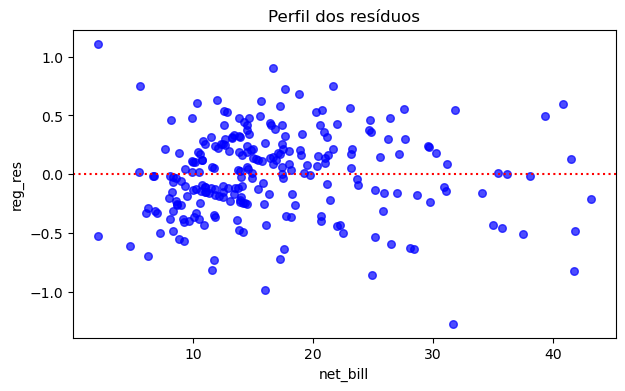

In [34]:
# Obtendo o resíduo
tips['reg_res'] = reg.resid

# Ploting
plt.figure(figsize=[7,4])
plt.scatter(tips['net_bill'], 
            tips['reg_res'],
            s=30, 
            color='blue', 
            alpha=.7
)
plt.axhline(y=0, color='red', ls='dotted')
plt.xlabel('net_bill')
plt.ylabel('reg_res')
plt.title('Perfil dos resíduos')

#### Aplicando o log na variável `net_bill`

In [36]:
# Gerando as matrizes design e y
y, X = patsy.dmatrices('np.log(tip) ~ smoker + np.log(net_bill)', tips)

# Fitting
reg_log = sm.OLS(y, X).fit()
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     56.57
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           7.20e-21
Time:                        12:59:03   Log-Likelihood:                -96.304
No. Observations:                 244   AIC:                             198.6
Df Residuals:                     241   BIC:                             209.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.4054      0.138     -2.941      0.004      -0.677      -0.134
smoker[T.No]         0.0153      0.048      0.322      0.748      -0.079       0.109
np.log(net_bill)     0.5157      0.048     10.636      0.000       0.420       0.611
==============================================================================
Omnibus:                       13.271   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               29.908
Skew:                           0.159   Prob(JB):                     3.20e-07
Kurtosis:                       4.685   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Perfil do resíduo considerando o log(net_bill)')

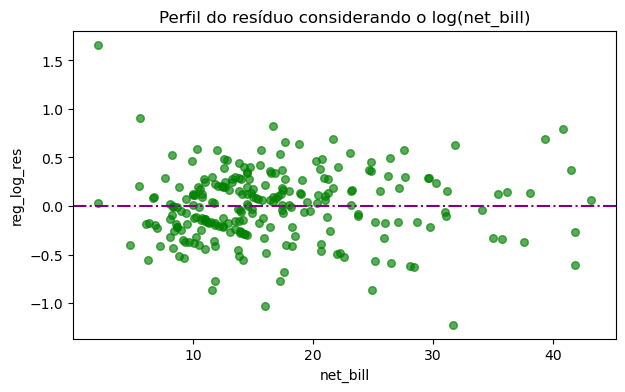

In [37]:
# Análisando a distribuição dos resíduos

# resíduo
tips['reg_log_res'] = reg_log.resid
# Visualização gráfica
plt.figure(figsize=[7,4])
plt.scatter(
    tips['net_bill'],
    tips['reg_log_res'],
    s=30,
    color='green',
    alpha=.65
)
plt.axhline(y=0, color='purple', ls='-.')
plt.xlabel('net_bill')
plt.ylabel('reg_log_res')
plt.title('Perfil do resíduo considerando o log(net_bill)')

#### Aplicando um ajuste polinomial de segunda ordem na variável `net_bill`

In [39]:
# Matrizes
y, X = patsy.dmatrices('np.log(tip) ~ smoker + I(net_bill + np.power(net_bill,2))',tips)

# Fitting
reg_poli = sm.OLS(y, X).fit()
reg_poli.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.248
Method:                 Least Squares   F-statistic:                     41.16
Date:                Thu, 24 Oct 2024   Prob (F-statistic):           4.21e-16
Time:                        12:59:03   Log-Likelihood:                -107.42
No. Observations:                 244   AIC:                             220.8
Df Residuals:                     241   BIC:                             231.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               0.7499      0.048     15.537      0.000       0.655       0.845
smoker[T.No]                            0.0491      0.050      0.979      0.329      -0.050       0.148
I(net_bill + np.power(net_bill, 2))     0.0006   6.75e-05      9.072      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.745   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.418   Jarque-Bera (JB):                1.780
Skew:                          -0.201   Prob(JB):                        0.411
Kurtosis:                       2.887   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Text(0.5, 1.0, 'Perfil do resíduo')

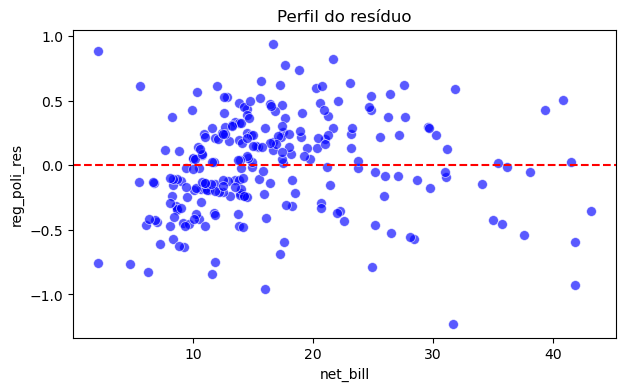

In [40]:
# Avaliando o resíduo 

# Resíduo
tips['reg_poli_res'] = reg_poli.resid
# Visualização gráfica
plt.figure(figsize=[7,4])
sns.scatterplot(x='net_bill', y='reg_poli_res', data=tips, color='blue', alpha=.65, s=50)
plt.axhline(y=0, color='red', ls='--')
plt.title('Perfil do resíduo')

##### Modelo com melhor desempenho [log(net_bill)]
De acordo com os ajustes e com os valores de R-quadrado o modelo que melhor explica a variábilidade dos dados é obitido aplicando-se o `log` à variável 
`net_bill`, com um $R^{2}=0.319$.

#### Calculando o valor de $R^2$ na escala de tip (sem o log), para o último modelo (polinomial)

In [43]:
# Obtendo os valores preditos pelo modelo 

tips['pred_reg_poli'] = np.exp(reg_poli.fittedvalues)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,net_bill,tip_pct,reg_res,reg_log_res,reg_poli_res,pred_reg_poli
0,16.99,1.01,Female,No,Sun,Dinner,2,15.98,0.063204,-0.984295,-1.029286,-0.955259,2.625337
1,10.34,1.66,Male,No,Sun,Dinner,3,8.68,0.191244,-0.264730,-0.217656,-0.343680,2.340811
2,21.01,3.50,Male,No,Sun,Dinner,3,17.51,0.199886,0.211843,0.166371,0.255238,2.711562
3,23.68,3.31,Male,No,Sun,Dinner,2,20.37,0.162494,0.068779,0.032529,0.131327,2.902641
4,24.59,3.61,Female,No,Sun,Dinner,4,20.98,0.172069,0.136930,0.104071,0.202267,2.948926


In [44]:
# O R^2 pode ser obtido fazendo

tips[['pred_reg_poli', 'tip']].corr()

,pred_reg_poli,tip
pred_reg_poli,1.000000,0.526523
tip,0.526523,1.000000


In [45]:
# O valor de R-quadrado é

print('O valor de R-quadrado para o modelo com ajuste polinomial de segunda ordem é')
tips[['pred_reg_poli', 'tip']].corr().iloc[0,1]**2

O valor de R-quadrado para o modelo com ajuste polinomial de segunda ordem é


0.27722683931093944

In [46]:
# Os modelos do item 1 têm os seguintes R-quadrados
print('--> Modelo com log(net_bill): R-quadrado= {}'.format(model_log.rsquared))
print('--> Modelo com o ajuste para um polinômio de segundo grau: R-quadrado= {}'.format(model_poli.rsquared))

--> Modelo com log(net_bill): R-quadrado= 0.2946732367304479
--> Modelo com o ajuste para um polinômio de segundo grau: R-quadrado= 0.30531328523408485


**Desta forma, pode-se afirmar que os modelos do item 1 apresentam melhor coeficiente de determinação.**

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário.
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão?
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis.
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste.

In [49]:
# Carregando a base de dados
df = pd.read_csv('previsao_de_renda.csv')
print(df.shape)
df.head()

(15000, 15)


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [50]:
# Removendo coluna repetida de index
df = df.drop('Unnamed: 0', axis=1)

In [51]:
print(df.shape)
df.head()

(15000, 14)


,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


In [52]:
# Analisando a existência de dados faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   data_ref               15000 non-null  object 
 1   id_cliente             15000 non-null  int64  
 2   sexo                   15000 non-null  object 
 3   posse_de_veiculo       15000 non-null  bool   
 4   posse_de_imovel        15000 non-null  bool   
 5   qtd_filhos             15000 non-null  int64  
 6   tipo_renda             15000 non-null  object 
 7   educacao               15000 non-null  object 
 8   estado_civil           15000 non-null  object 
 9   tipo_residencia        15000 non-null  object 
 10  idade                  15000 non-null  int64  
 11  tempo_emprego          12427 non-null  float64
 12  qt_pessoas_residencia  15000 non-null  float64
 13  renda                  15000 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(6)
memory usa

In [53]:
pct_missings = (df['tempo_emprego'].isnull().sum()/df.shape[0])*100
print('Os dados faltantes correspondem a {}% do DataFrame'.format(round(pct_missings,2)))

Os dados faltantes correspondem a 17.15% do DataFrame


In [54]:
# Como a variável explicativa é a mesma com dados faltantes,
# façamos a remoção da linhas que correspondem a tais dados

df = df.dropna()

In [55]:
#Verificando os dados faltantes novamente
df.isnull().sum()

data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

#### Aplicando a regressão simples

In [57]:
# Utilizando o statsmodels.formula.api

regression = smf.ols('renda ~ tempo_emprego', data=df).fit()
regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     2162.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:59:04   Log-Likelihood:            -1.2963e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2177.9041    112.212     19.409      0.000    1957.951    2397.857
tempo_emprego   510.0119     10.968     46.501      0.000     488.513     531.510
==============================================================================
Omnibus:                    17028.827   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7679294.474
Skew:                           7.717   Prob(JB):                         0.00
Kurtosis:                     123.800   Cond. No.                         15.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Perfil do resíduo')

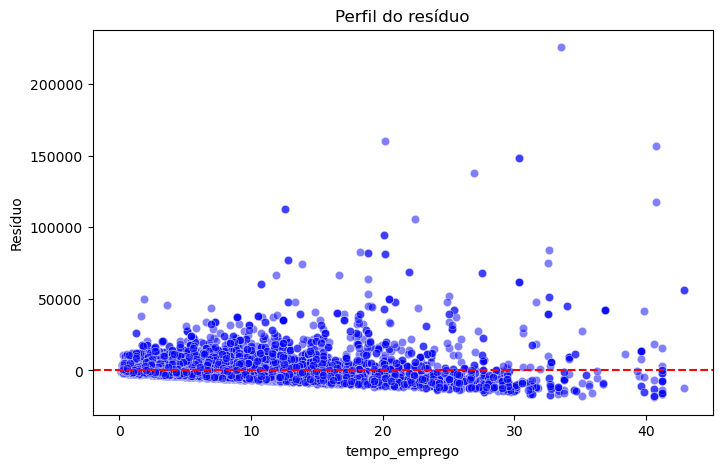

In [58]:
# Análise da distribuição dos resíduos

plt.figure(figsize=[8,5])
sns.scatterplot(x='tempo_emprego', 
                y=regression.resid,
                data=df,
                color='blue',
                alpha=.5
)
plt.axhline(y=0, color='red', ls='--')
plt.ylabel('Resíduo')
plt.title('Perfil do resíduo')

#### <span style='color:red'>Avaliando para outros ajustes com o objetivo de identificar a melhor regressão (o melhor modelo)

##### <span style='color:purple'> Ajuste logarítmico na variável renda </span>

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.171
Method:                 Least Squares   F-statistic:                     2564.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:59:04   Log-Likelihood:                -15150.
No. Observations:               12427   AIC:                         3.030e+04
Df Residuals:                   12425   BIC:                         3.032e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.8384      0.011    699.851

Text(0.5, 1.0, 'Perfil dos resíduos')

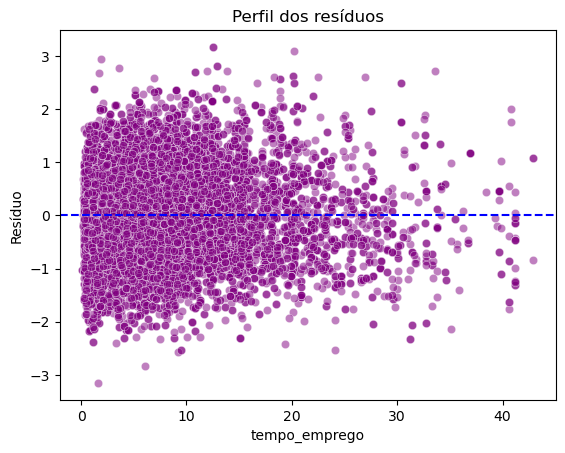

In [61]:
# Aplicando o log(renda)

reg_log = smf.ols('np.log(renda) ~ tempo_emprego', df).fit()
print(reg_log.summary())
df['res_reg_log'] = reg_log.resid

# Visualização gráfica dos resíduos
sns.scatterplot(x='tempo_emprego', y='res_reg_log', data=df, color='purple', alpha=.5)
plt.axhline(y=0, color='blue', ls='--')
plt.ylabel('Resíduo')
plt.title('Perfil dos resíduos')

##### <span style='color:purple'> Ajuste logarítmico em ambas as variáveis </span>

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.143
Model:                            OLS   Adj. R-squared:                  0.143
Method:                 Least Squares   F-statistic:                     2069.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:59:05   Log-Likelihood:                -15359.
No. Observations:               12427   AIC:                         3.072e+04
Df Residuals:                   12425   BIC:                         3.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 7.71

Text(0, 0.5, 'resíduo')

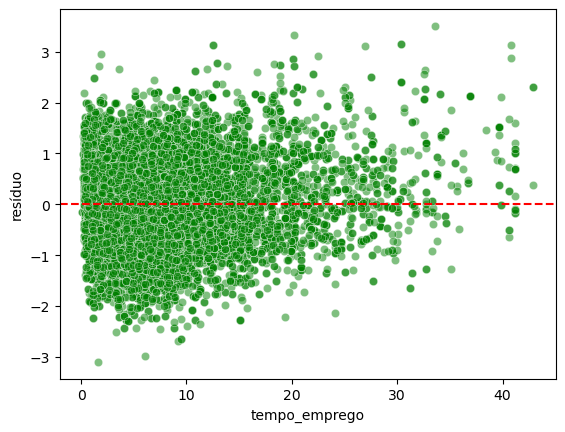

In [63]:
# Aplicando log em ambas as variáveis
reg_log_log = smf.ols('np.log(renda) ~ np.log(tempo_emprego)', data=df).fit()
print(reg_log_log.summary())
df['res_reg_log_log'] = reg_log_log.resid
# Resíduos plot
sns.scatterplot(x='tempo_emprego', y='res_reg_log_log', data=df, color='green', alpha=.5)
plt.axhline(y=0, color='red', ls='--')
plt.ylabel('resíduo')

##### <span style='color:purple'> Ajuste log(renda) e polinomial (segundo grau) na variável tempo_emprego </span>

                            OLS Regression Results                            
Dep. Variable:          np.log(renda)   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1891.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:59:05   Log-Likelihood:                -15436.
No. Observations:               12427   AIC:                         3.088e+04
Df Residuals:                   12425   BIC:                         3.089e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Perfil dos resíduos')

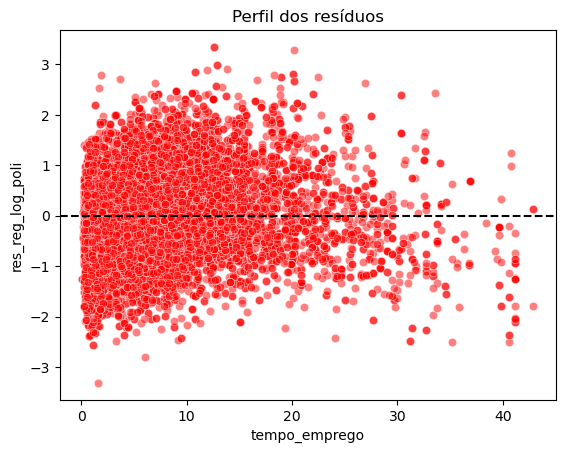

In [65]:
reg_log_poli = smf.ols('np.log(renda) ~ I(tempo_emprego + np.power(tempo_emprego,2))',data=df).fit()
print(reg_log_poli.summary())
df['res_reg_log_poli'] = reg_log_poli.resid

# Resíduos
sns.scatterplot(x='tempo_emprego', y='res_reg_log_poli', data=df, color='red', alpha=.5)
plt.axhline(y=0, color='black', ls='--')
plt.title('Perfil dos resíduos')

##### <span style='color:purple'> Ajuste polinomial (segundo grau) na variável tempo_emprego </span>

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     2117.
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:59:05   Log-Likelihood:            -1.2965e+05
No. Observations:               12427   AIC:                         2.593e+05
Df Residuals:                   12425   BIC:                         2.593e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

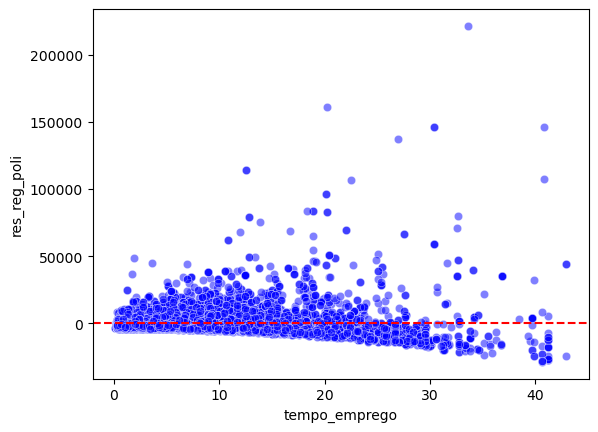

In [67]:
# Ajuste polinomial (segundo grau) no tempo_emprego

reg_poli = smf.ols('renda ~ I(tempo_emprego + np.power(tempo_emprego,2))', data=df).fit()
print(reg_poli.summary())
df['res_reg_poli'] = reg_poli.resid

# Plot resíduos
sns.scatterplot(x='tempo_emprego', y='res_reg_poli', data=df,color='blue', alpha=.5)
plt.axhline(y=0, color='red', ls='--')

#### Insights

Após todos os ajustes realizados, pode-se afirmar que o ajuste mais satisfatório foi gerado pela aplicação do logaritmo na variável `renda`, mantendo a variável `tempo_emprego` inalterada. O que resultou em um $R^{2}=0.171$, superior a todos os demais.

#### Modelo de regressão múltipla

In [70]:
# Aplicando a regressão múltipla

multi_reg = smf.ols('renda ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil'
                    '+ tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df).fit()
multi_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     178.0
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:59:06   Log-Likelihood:            -1.2879e+05
No. Observations:               12427   AIC:                         2.576e+05
Df Residuals:                   12402   BIC:                         2.578e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                        -5626.6247   2500.235     -2.250      0.024   -1.05e+04    -725.776
sexo[T.M]                         6052.8592    155.859     38.836      0.000    5747.352    6358.367
posse_de_veiculo[T.True]            48.9098    150.374      0.325      0.745    -245.846     343.666
posse_de_imovel[T.True]            366.5747    148.723      2.465      0.014      75.054     658.095
tipo_renda[T.Bolsista]           -1357.7175   2564.833     -0.529      0.597   -6385.188    3669.753
tipo_renda[T.Empresário]           823.1460    158.826      5.183      0.000     511.822    1134.470
tipo_renda[T.Pensionista]        -2682.6331   2565.489     -1.046      0.296   -7711.391    2346.125
tipo_renda[T.Servidor público]     137.0942    236.327      0.580      0.562    -326.143     600.332
educacao[T.Pós graduação]         1090.5064   1690.396      0.645      0.519   -2222.932    4403.945
educacao[T.Secundário]             607.3280    765.686      0.793      0.428    -893.536    2108.192
educacao[T.Superior completo]     1225.5587    768.564      1.595      0.111    -280.947    2732.064
educacao[T.Superior incompleto]    220.4722    827.097      0.267      0.790   -1400.767    1841.712
estado_civil[T.Separado]          1161.1096   1182.969      0.982      0.326   -1157.693    3479.912
estado_civil[T.Solteiro]           819.9016   1158.206      0.708      0.479   -1450.362    3090.165
estado_civil[T.União]             -475.3334    267.717     -1.776      0.076   -1000.101      49.434
estado_civil[T.Viúvo]             1053.5626   1229.396      0.857      0.391   -1356.245    3463.370
tipo_residencia[T.Casa]           -298.3088    575.821     -0.518      0.604   -1427.008     830.390
tipo_residencia[T.Com os pais]    -388.7990    641.844     -0.606      0.545   -1646.914     869.316
tipo_residencia[T.Comunitário]    -459.8284   1120.521     -0.410      0.682   -2656.224    1736.567
tipo_residencia[T.Estúdio]          77.2381   1056.186      0.073      0.942   -1993.051    2147.527
tipo_residencia[T.Governamental]    73.8042    701.702      0.105      0.916   -1301.641    1449.249
qtd_filhos                       -1126.6107   1147.916     -0.981      0.326   -3376.703    1123.482
idade                               42.0025      8.517      4.931      0.000      25.307      58.698
tempo_emprego                      554.7551     11.044     50.230      0.000     533.107     576.404
qt_pessoas_residencia             1269.8493   1145.868      1.108      0.268    -976.229    3515.928
==============================================================================
Omnibus:                    17568.773   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9884998.164
Skew:             

#### <span style='color:purple'>Aplicando o logaritmo na variável `renda` para melhorar a resposta do modelo </span>

In [72]:
# Considerando o logaritmo da renda

multi_reg = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil'
                    '+ tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia', data=df).fit()
multi_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     287.5
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:59:06   Log-Likelihood:                -13568.
No. Observations:               12427   AIC:                         2.719e+04
Df Residuals:                   12402   BIC:                         2.737e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                            6.5847      0.235     28.006      0.000       6.124       7.046
sexo[T.M]                            0.7874      0.015     53.723      0.000       0.759       0.816
posse_de_veiculo[T.True]             0.0441      0.014      3.119      0.002       0.016       0.072
posse_de_imovel[T.True]              0.0829      0.014      5.926      0.000       0.055       0.110
tipo_renda[T.Bolsista]               0.2209      0.241      0.916      0.360      -0.252       0.694
tipo_renda[T.Empresário]             0.1551      0.015     10.387      0.000       0.126       0.184
tipo_renda[T.Pensionista]           -0.3087      0.241     -1.280      0.201      -0.782       0.164
tipo_renda[T.Servidor público]       0.0576      0.022      2.591      0.010       0.014       0.101
educacao[T.Pós graduação]            0.1071      0.159      0.673      0.501      -0.205       0.419
educacao[T.Secundário]              -0.0141      0.072     -0.196      0.844      -0.155       0.127
educacao[T.Superior completo]        0.0938      0.072      1.298      0.194      -0.048       0.235
educacao[T.Superior incompleto]     -0.0432      0.078     -0.555      0.579      -0.196       0.109
estado_civil[T.Separado]             0.3265      0.111      2.935      0.003       0.108       0.545
estado_civil[T.Solteiro]             0.2672      0.109      2.453      0.014       0.054       0.481
estado_civil[T.União]               -0.0343      0.025     -1.361      0.174      -0.084       0.015
estado_civil[T.Viúvo]                0.3689      0.116      3.191      0.001       0.142       0.596
tipo_residencia[T.Casa]             -0.0442      0.054     -0.815      0.415      -0.150       0.062
tipo_residencia[T.Com os pais]      -0.0258      0.060     -0.427      0.670      -0.144       0.093
tipo_residencia[T.Comunitário]      -0.1196      0.105     -1.135      0.256      -0.326       0.087
tipo_residencia[T.Estúdio]           0.0665      0.099      0.670      0.503      -0.128       0.261
tipo_residencia[T.Governamental]    -0.0571      0.066     -0.865      0.387      -0.186       0.072
qtd_filhos                          -0.2658      0.108     -2.463      0.014      -0.477      -0.054
idade                                0.0053      0.001      6.624      0.000       0.004       0.007
tempo_emprego                        0.0617      0.001     59.398      0.000       0.060       0.064
qt_pessoas_residencia                0.2926      0.108      2.716      0.007       0.081       0.504
==============================================================================
Omnibus:                        0.858   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.839
Skew:             

In [73]:
# Considerando a remoção das variáveis menos significativas 
# de acordo com o P-value poderiamos remover "educação" e "tipo_residencia"

# Porém, para uma tentativa mais geral de análise, olharei para correlação 
# das variáveis com a varíavel renda (talvez ajude)
df2 = df[['renda', 'sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'tipo_renda', 'estado_civil',
          'idade', 'tempo_emprego', 'qt_pessoas_residencia']]
df2.head(2)

,renda,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,estado_civil,idade,tempo_emprego,qt_pessoas_residencia
0,8060.34,F,False,True,0,Empresário,Solteiro,26,6.602740,1.0
1,1852.15,M,True,True,0,Assalariado,Casado,28,7.183562,2.0


In [74]:
# Gerando dummies
df2 = pd.get_dummies(df2)

In [75]:
df2.columns

Index(['renda', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos', 'idade',
       'tempo_emprego', 'qt_pessoas_residencia', 'sexo_F', 'sexo_M',
       'tipo_renda_Assalariado', 'tipo_renda_Bolsista',
       'tipo_renda_Empresário', 'tipo_renda_Pensionista',
       'tipo_renda_Servidor público', 'estado_civil_Casado',
       'estado_civil_Separado', 'estado_civil_Solteiro', 'estado_civil_União',
       'estado_civil_Viúvo'],
      dtype='object')

In [76]:
# A correlação

corr = df2.corr()
# corr

<Axes: >

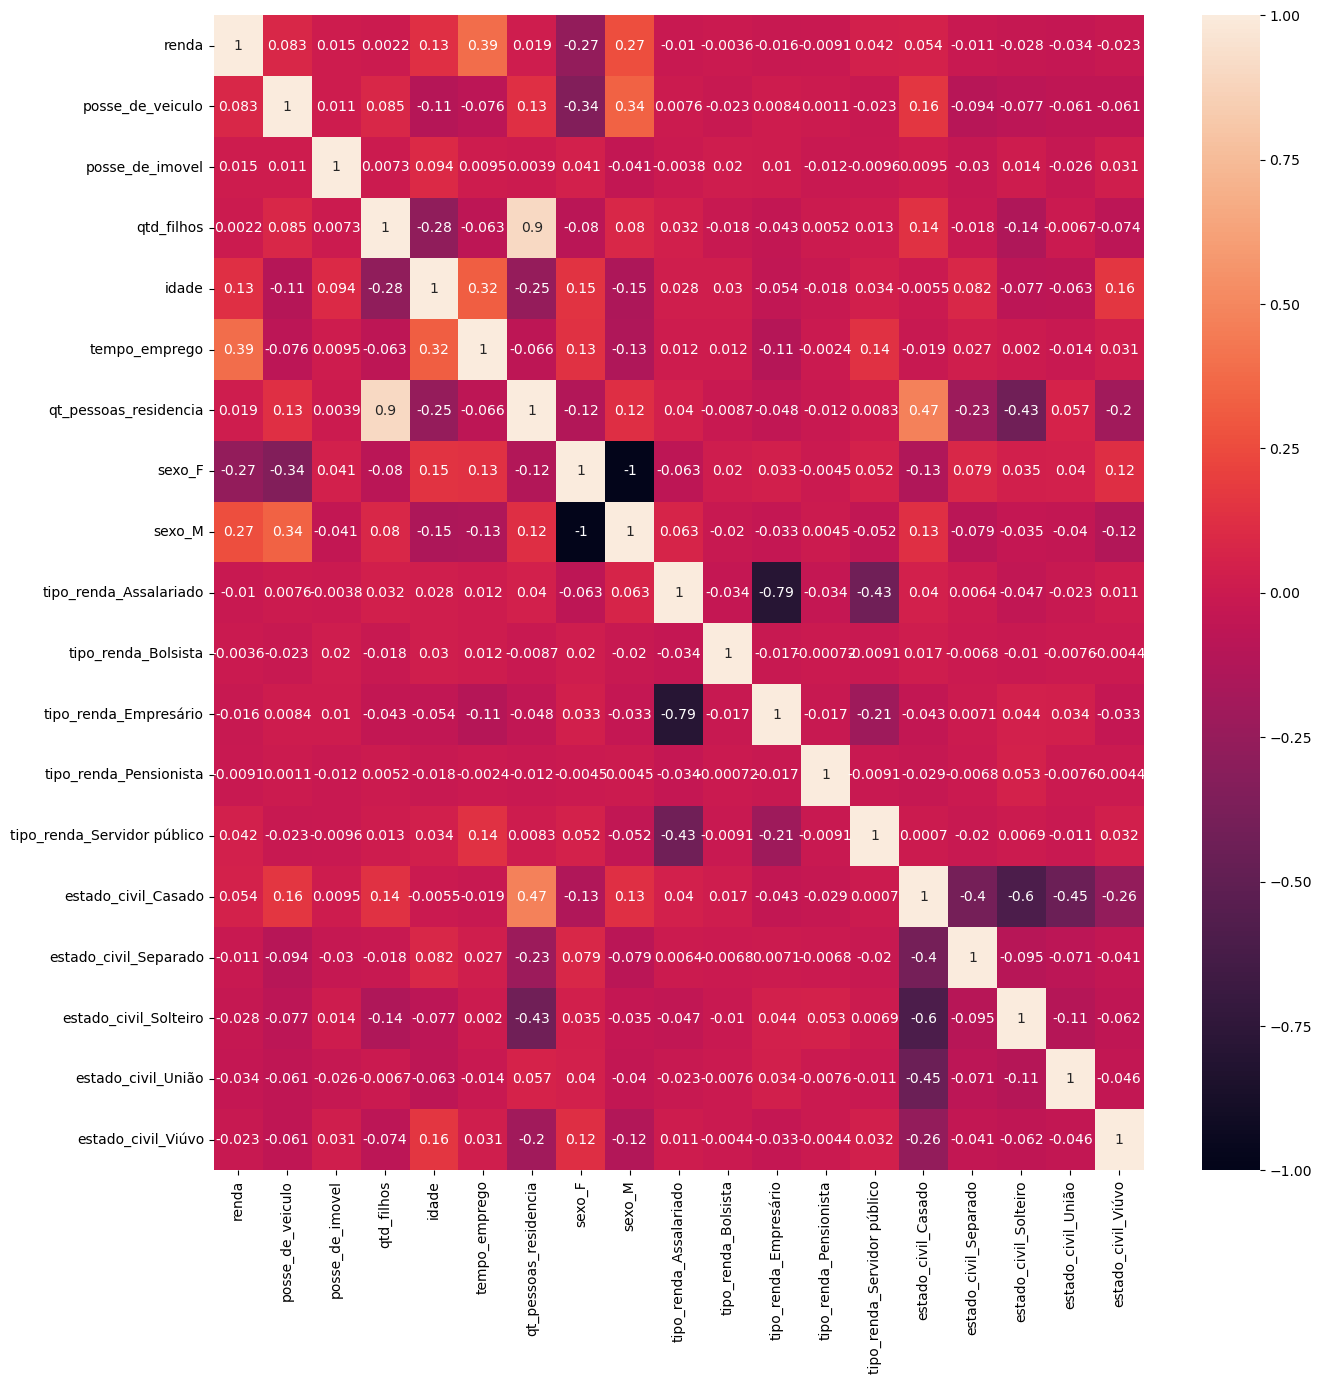

In [77]:
# Gerando um heatmap
plt.figure(figsize=[15,15])
sns.heatmap(corr, annot=True)

##### Análise

De modo geral, após analisar a correlação da renda com as demais variáveis, pode-se dizer que as variáveis que não tem correlação significativa são: `estado_civil`, `tipo_renda`, `qt_pessoas_residencia`, `qtd_filhos` e `posse_imovel`. Apesar de `tipo_renda` não possuir uma correlação muito grande ela possui um bom valor de P-value com o log(renda), desta forma, vamos manter tal variável (mesmo possuindo um intervalo de confiança questionável para algumas subvariáveis `tipo_renda[T.Bolsista]` e `tipo_renda[T.Pensionista]`).
- Aqui optei pela utilização da correlação, verificando como a variável de interesse (renda) se comporta com as demais, porém as variáveis que foram removidas com base nessa análise poderiam ter sido removidas com base no intervalo de confiança.


- Vamos testar o modelo sem tais variáveis.

In [79]:
# Novo modelo

multi_reg = smf.ols('np.log(renda) ~ sexo + posse_de_veiculo + idade + tempo_emprego + tipo_renda', data=df).fit()
multi_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(renda)   R-squared:                       0.350
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     837.2
Date:                Thu, 24 Oct 2024   Prob (F-statistic):               0.00
Time:                        12:59:07   Log-Likelihood:                -13636.
No. Observations:               12427   AIC:                         2.729e+04
Df Residuals:                   12418   BIC:                         2.736e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          7.2258      0.032    228.313      0.000       7.164       7.288
sexo[T.M]                          0.7767      0.015     53.394      0.000       0.748       0.805
posse_de_veiculo[T.True]           0.0588      0.014      4.191      0.000       0.031       0.086
tipo_renda[T.Bolsista]             0.3136      0.242      1.296      0.195      -0.161       0.788
tipo_renda[T.Empresário]           0.1614      0.015     10.850      0.000       0.132       0.191
tipo_renda[T.Pensionista]         -0.2830      0.242     -1.170      0.242      -0.757       0.191
tipo_renda[T.Servidor público]     0.0765      0.022      3.447      0.001       0.033       0.120
idade                              0.0050      0.001      6.798      0.000       0.004       0.006
tempo_emprego                      0.0616      0.001     59.200      0.000       0.060       0.064
==============================================================================
Omnibus:                        0.674   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.714   Jarque-Bera (JB):                0.647
Skew:                           0.015   Prob(JB):                        0.723
Kurtosis:                       3.019   Cond. No.                     1.58e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### <span style='color:purple'>Análise dos resíduos</span>

In [81]:
# Obtendo e armazenando os resíduos
df['residuos'] = multi_reg.resid

In [82]:
sns.set_theme(style='darkgrid')

Text(0.5, 1.0, 'Resíduos em função da variável sexo')

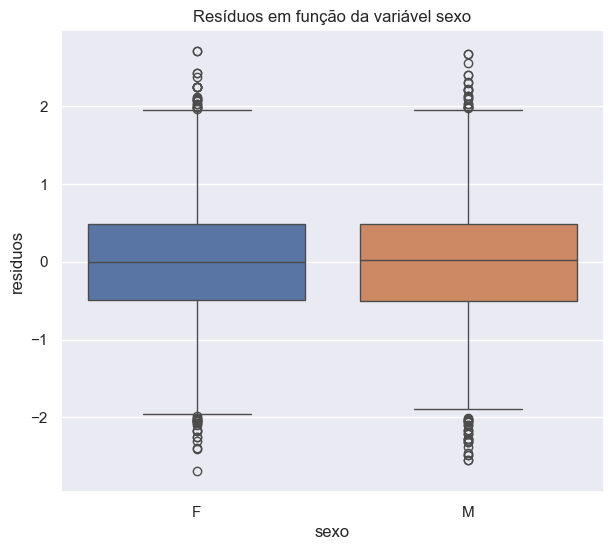

In [83]:
# Resíduos e a variável "sexo"

plt.figure(figsize=[7,6])
sns.boxplot(x='sexo', 
            y='residuos', 
            data=df,
            hue='sexo'
)
plt.title('Resíduos em função da variável sexo')

Text(0.5, 1.0, 'Resíduos em função da variável posse_de_veiculo')

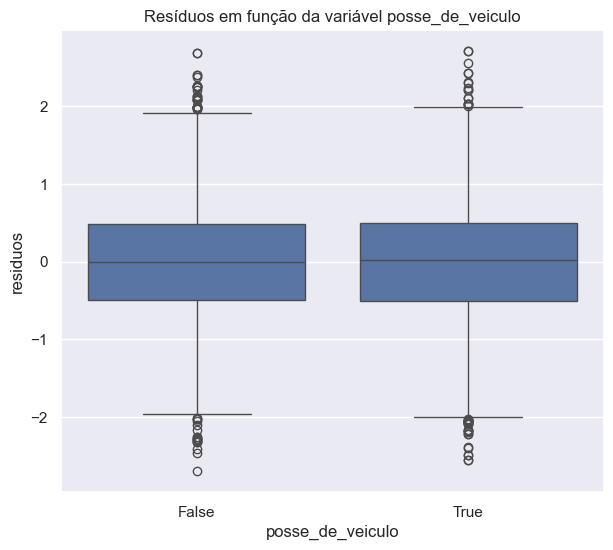

In [84]:
# Resíduos e a variável "posse_de_veiculo"
plt.figure(figsize=[7,6])
sns.boxplot(
    x='posse_de_veiculo',
    y='residuos',
    data=df,
    # hue='posse_de_veiculo'
)
plt.title('Resíduos em função da variável posse_de_veiculo')

Text(0.5, 1.0, 'Resíduos em função da variável idade')

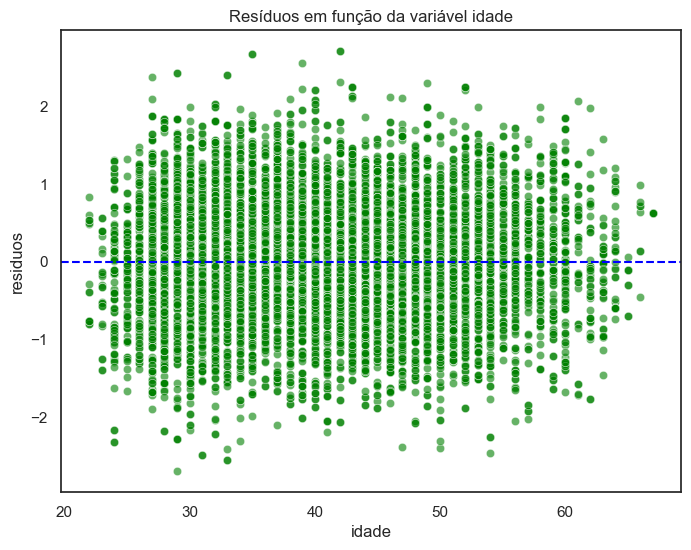

In [85]:
# Resíduos e a variável "idade"
sns.set_theme(style='white')
plt.figure(figsize=[8,6])
sns.scatterplot(
    x='idade',
    y='residuos',
    data=df,
    color='green',
    alpha=.6
)
plt.axhline(y=0, color='blue', ls='--')
plt.title('Resíduos em função da variável idade')

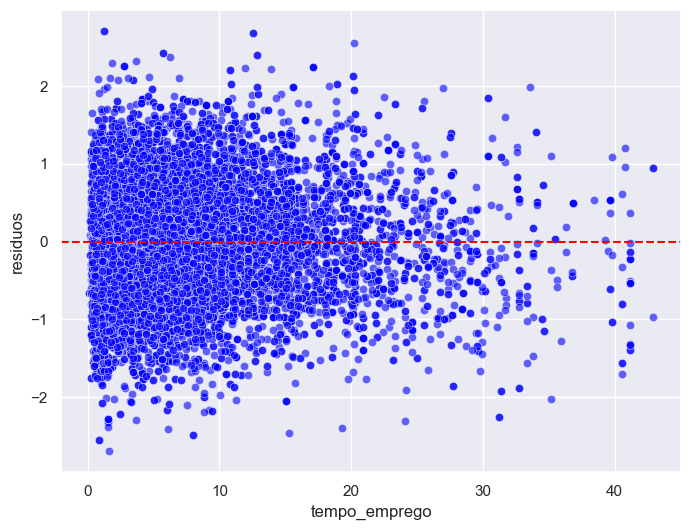

In [86]:
# Resíduos e a variável "tempo_emprego"
sns.set_theme(style='darkgrid')
plt.figure(figsize=[8,6])
sns.scatterplot(
    x='tempo_emprego',
    y='residuos',
    data=df,
    color='blue',
    alpha=.6
)
plt.axhline(y=0, color='red', ls='--')

<Axes: xlabel='tipo_renda', ylabel='residuos'>

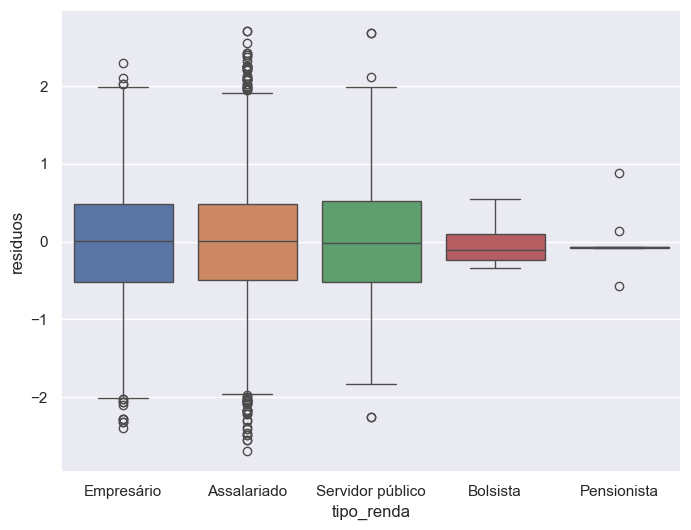

In [87]:
# Resíduos e a variável "tipo_renda"
sns.set_theme(style='darkgrid')
plt.figure(figsize=[8,6])
sns.boxplot(
    x='tipo_renda',
    y='residuos',
    data=df,
    hue='tipo_renda'
)

Como comentado anteriormente, com relação ao intervalo de confiança, as "subvariáveis" `Bolsista` e `Pensionista` de fato possuem um perfil atípico se comparado às demais.

**A distribuição dos resíduos para cada uma das variáveis analisadas tem uma boa simetria em torno de zero ($y=0$), isso indica que o modelo possui uma qualidade boa, mesmo com um R-quadrado não muito grande.**